# Dimensionality Reduction

## The Curse of Dimensionality

## Main Approaches for Dimensionality Reduction
Projection and Manifold Learning

### Projection

### Manifold Learning

## Dimensionality Reduction Algorithms

### PCA

In [1]:
import numpy as np
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import sys

In [2]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "dim_reduction"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

In [5]:
X.shape

(60, 3)

### PCA using SVD decomposition

In [6]:
X_centered = X - X.mean(axis=0)
U,s,V = np.linalg.svd(X_centered)

In [8]:
c1 = V.T[:, 0]
c1

array([0.93636116, 0.29854881, 0.18465208])

In [9]:
c2 =  V.T[:, 1]
c2

array([-0.34027485,  0.90119108,  0.2684542 ])

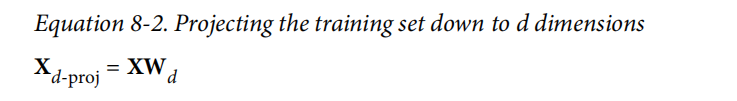

In [11]:
W2 = V.T[:, :2]
X2D = X_centered.dot(W2)
X2D.shape

(60, 2)

### PCA using Scikit-Learn

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)
X2D.shape

(60, 2)

In [13]:
pca.components_

array([[-0.93636116, -0.29854881, -0.18465208],
       [ 0.34027485, -0.90119108, -0.2684542 ]])

In [14]:
pca.explained_variance_ratio_

array([0.84248607, 0.14631839])

In [15]:
1 - pca.explained_variance_ratio_.sum()

0.011195535570688975

### Choosing the Right Number of Dimensions

In [17]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X)
X_reduced.shape

(60, 2)

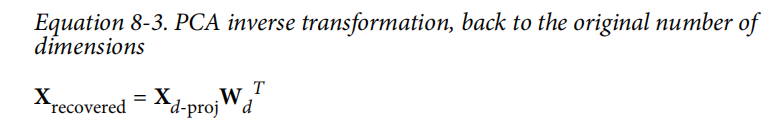

### Randomized PCA

In [19]:
rnd_pca = PCA(n_components=2, svd_solver="randomized")
X_reduced = rnd_pca.fit_transform(X)
X_reduced.shape

(60, 2)

### Incremental PCA

In [20]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [21]:
X, y = mnist['data'], mnist['target']

In [22]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [23]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)

for batch in np.array_split(X_train, n_batches):
    inc_pca.partial_fit(batch)

X_reduced = inc_pca.transform(X_train)

In [24]:
X_reduced.shape

(60000, 154)

### Kernel PCA

In [25]:
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

In [26]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)

In [28]:
X_reduced.shape

(60, 2)

In [32]:
rbf_pca.n_components

2

### Selecting a Kernel and Tuning Hyperparameters

In [34]:
X, y = mnist['data'], mnist['target']

X_train, X_test, y_train, y_test = X[:600], X[600:], y[:600], y[600:]

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
    ("kpca", KernelPCA(n_components=154)),
    ("log_reg", LogisticRegression())
])

param_grid = [{
    "kpca__gamma": [0.01, 0.03, 0.05],
    "kpca__kernel": ["rbf", "sigmoid"]
}]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X_train, y_train)

D:\Python_Tools\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Python_Tools\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\Python_Tools\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Python_Tools\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\Python_Tools\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('kpca',
                                        KernelPCA(alpha=1.0, coef0=1,
                                                  copy_X=True, degree=3,
                                                  eigen_solver='auto',
                                                  fit_inverse_transform=False,
                                                  gamma=None, kernel='linear',
                                                  kernel_params=None,
                                                  max_iter=None,
                                                  n_components=154, n_jobs=None,
                                                  random_state=None,
                                                  remove_zero_eig=False,
                                                  tol=0)),
                                       ('log_reg',
               

In [39]:
print(grid_search.best_params_)

{'kpca__gamma': 0.01, 'kpca__kernel': 'rbf'}


## LLE(Locally Linear Embedding)

In [40]:
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

In [42]:
X.shape

(1000, 3)

In [43]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X_reduced = lle.fit_transform(X)

In [45]:
X_reduced.shape

(1000, 2)

Saving figure lle_unrolling_plot


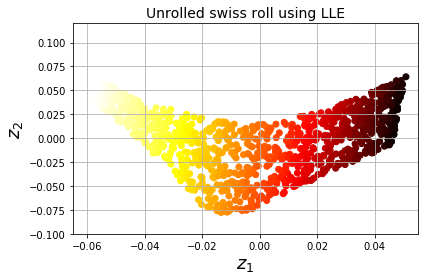

In [48]:
plt.title("Unrolled swiss roll using LLE", fontsize=14)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
plt.axis([-0.065, 0.055, -0.1, 0.12])
plt.grid(True)

save_fig("lle_unrolling_plot")
plt.show()

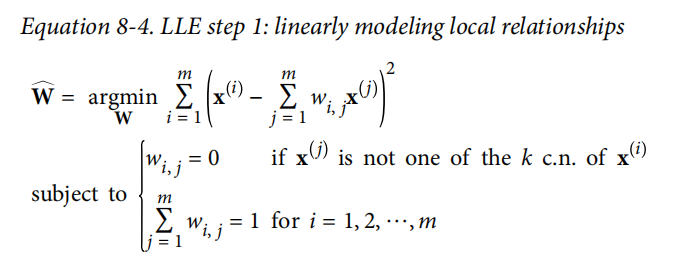

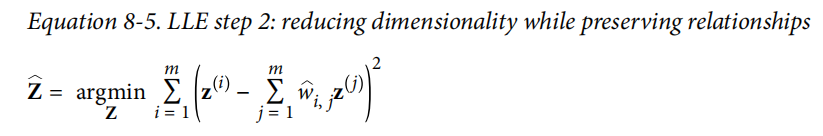

### Other Dimensionality Reduction Techniques